# Dataset

* 60,000 training examples
* 10,00 testing examples
* 10 classes
* 28x28 grayscale/single channel images

class category<br>
1. T-shirt/top
2. Trouser/pants
3. Pullover shirt
4. Dress
5. Coat
6. Sandal
7. Shirt
8. Sneaker
9. Bag
10. Ankle boot

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
%cd /content/gdrive/My\ Drive/Project/FashionMNIST\ Classification\ without\ CNN

/content/gdrive/My Drive/Project/FashionMNIST Classification without CNN


In [ ]:
# 패키지 불러오기

import os
import numpy as np
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten, GaussianNoise
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. Data Load & preprocessing

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images, valid_images, train_labels, valid_labels = train_test_split(
    train_images, train_labels, test_size=10000, random_state=777)


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
# train dataset
print(train_images.shape)
print(train_labels.shape)
print(np.unique(train_labels))

(50000, 28, 28)
(50000,)
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
print(valid_images.shape)
print(valid_labels.shape)
print(np.unique(valid_labels))

(10000, 28, 28)
(10000,)
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
print(test_images.shape)
print(test_labels.shape)
print(np.unique(test_labels))

(10000, 28, 28)
(10000,)
[0 1 2 3 4 5 6 7 8 9]


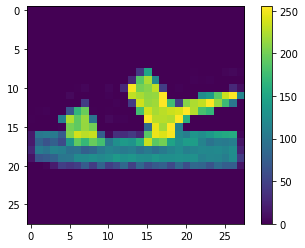

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# one-hot encoding
train_labels = to_categorical(train_labels)
valid_labels = to_categorical(valid_labels)
test_labels = to_categorical(test_labels)

# image preprocessing
train_images = train_images / 255.0
valid_images = valid_images / 255.0
test_images = test_images / 255.0

# 2. Modeling

In [ ]:
inputs = Input(shape=(28,28))
x = Flatten()(inputs)
x = Dense(784, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(784, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)

In [ ]:
# Early Stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=7)

# model seleiction setting
filepath = 'weights/best_model01-{epoch:02d}-{val_accuracy:.2f}.h5'
mc = ModelCheckpoint(filepath, monitor='val_loss', mode='min', save_best_only=True)

# learning rate scheduler
# def step_decay(epoch, lr):
#     if epoch < 10:
#         return lr
#     else:
#         return lr * tf.math.exp(-0.1)

# lrate = LearningRateScheduler(step_decay)

# 3. Training

In [ ]:
# Model Creation
model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 784)               615440    
_________________________________________________________________
batch_normalization_6 (Batch (None, 784)               3136      
_________________________________________________________________
dense_13 (Dense)             (None, 784)               615440    
_________________________________________________________________
batch_normalization_7 (Batch (None, 784)               3136      
_________________________________________________________________
dense_14 (Dense)             (None, 128)              

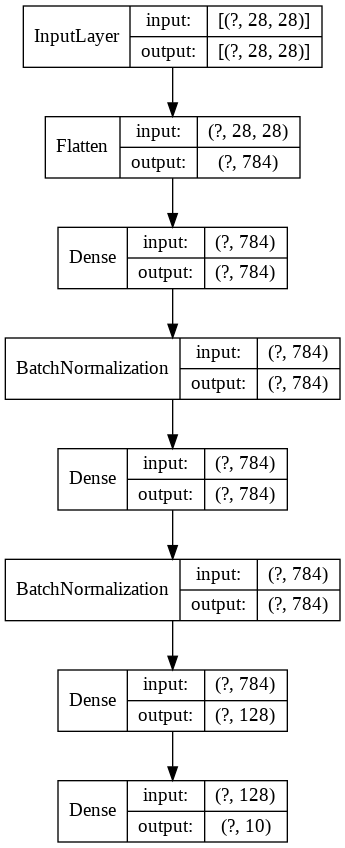

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=False)

In [ ]:
# adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.009)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# training
hist = model.fit(train_images, train_labels, epochs=10000, batch_size=16,
                 validation_data=(valid_images, valid_labels),
                 callbacks=[es, mc])

Epoch 1/10000
3125/3125 [==============================] - 9s 3ms/step - loss: 0.5863 - accuracy: 0.7936 - val_loss: 0.4649 - val_accuracy: 0.8266
Epoch 2/10000
3125/3125 [==============================] - 9s 3ms/step - loss: 0.4421 - accuracy: 0.8398 - val_loss: 0.3655 - val_accuracy: 0.8675
Epoch 3/10000
3125/3125 [==============================] - 9s 3ms/step - loss: 0.4025 - accuracy: 0.8513 - val_loss: 0.3627 - val_accuracy: 0.8718
Epoch 4/10000
3125/3125 [==============================] - 9s 3ms/step - loss: 0.3755 - accuracy: 0.8610 - val_loss: 0.3697 - val_accuracy: 0.8705
Epoch 5/10000
3125/3125 [==============================] - 9s 3ms/step - loss: 0.3618 - accuracy: 0.8670 - val_loss: 0.3598 - val_accuracy: 0.8693
Epoch 6/10000
3125/3125 [==============================] - 9s 3ms/step - loss: 0.3454 - accuracy: 0.8724 - val_loss: 0.3473 - val_accuracy: 0.8760
Epoch 7/10000
3125/3125 [==============================] - 9s 3ms/step - loss: 0.3309 - accuracy: 0.8776 - val_loss: 0

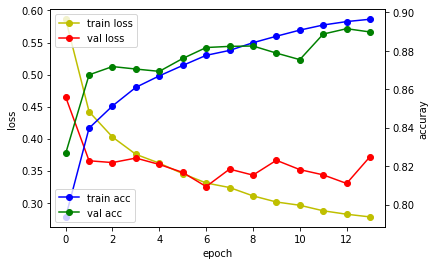

In [ ]:
# train curve

%matplotlib inline

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss', marker='o')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss', marker='o')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc', marker='o')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc', marker='o')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 4. Evaluation

In [ ]:
filename = 'best_model01-07-0.88.h5'
best_model = load_model(os.path.join('weights', filename))

scores = best_model.evaluate(valid_images, valid_labels, batch_size=16)
print("%s: %.3f" %(best_model.metrics_names[0], scores[0]))
print("%s: %.3f" %(best_model.metrics_names[1], scores[1]))

625/625 [==============================] - 1s 2ms/step - loss: 0.3253 - accuracy: 0.8817
loss: 0.325
accuracy: 0.882
